In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
from plots import *
from math import sqrt

In [2]:
import matplotlib.pyplot as plt
from matplotlib import rc
import seaborn as sns

rc('font', **{'family': 'sans-serif',
              'sans-serif': ['Computer Modern Roman']})
params = {'axes.labelsize': 12,
          'font.size': 12,
          'legend.fontsize': 12,
          'xtick.labelsize': 10,
          'ytick.labelsize': 10,
          'text.usetex': True,
          'figure.figsize': (8, 6)}
plt.rcParams.update(params)

sns.set_context("poster")
sns.set_style("ticks")

In [3]:
xls = pd.ExcelFile("Final Plotting/Experiment - 2_1.xlsx")

In [4]:
df1 = pd.read_excel(xls, sheet_name="VGG_cifar10", index_col=0)
df2 = pd.read_excel(xls, sheet_name="VGG_cifar100", index_col=0)
df3 = pd.read_excel(xls, sheet_name="VGG_SVHN", index_col=0)
df4 = pd.read_excel(xls, sheet_name="VGG_FashionMNIST", index_col = 0)

# VGG CIFAR10

In [5]:
df1.head()

,Unnamed: 1,Accuracy on CIFAR10,Unnamed: 3,Unnamed: 4
NaN,Percentage of Weights Prune,CIFAR10,CIFAR100,Random
0.0,0,92.58,92.41,92.58
1.0,20,92.88,92.27,91.7
2.0,36,92.57,92.56,90.28
3.0,48.8,92.63,92.72,87.89


In [6]:
df1 = df1.rename(columns = {"Unnamed: 1":"% Pruned", "Accuracy on CIFAR10":"CIFAR10", "Unnamed: 3":"CIFAR100", "Unnamed: 4":"Random"})

In [7]:
df1 = df1.iloc[1:]

In [8]:
df1.dropna(inplace = True)

In [9]:
x = np.float64(df1["% Pruned"].values)
cifar_10 = np.float64(df1["CIFAR10"].values)
cifar_100 = np.float64(df1["CIFAR100"].values)
rd = np.float64(df1["Random"].values)

In [10]:
idx_vals = [0,20,36,48.8,59.04,67.23,73.79,86.58,93.13,96.48,98.2,99.08,99.53,99.81,99.88]
idx = []
for i in range(len(x)):
    for j in range(len(idx_vals)):
        if x[i] == idx_vals[j]:
            idx.append(i)
idx.sort()

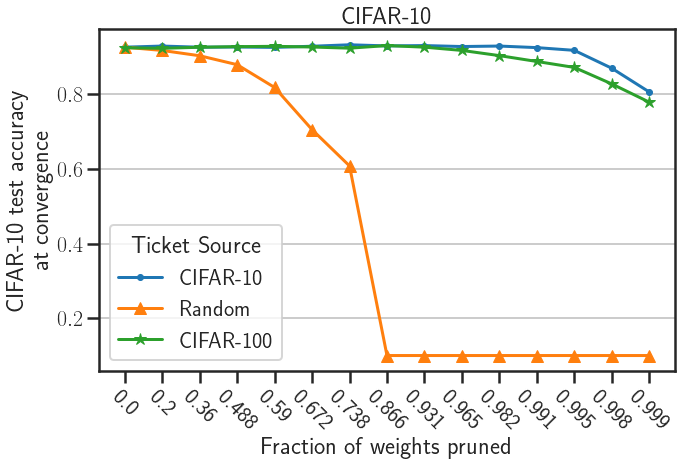

In [12]:
plt.figure(figsize=(10,7))
plt.plot([i for i in range(len(idx))], [cifar_10[i]/100 for i in idx], label='CIFAR-10', marker = '.')
plt.plot([i for i in range(len(idx))], [rd[i]/100 for i in idx], label="Random", marker='^')
plt.plot([i for i in range(len(idx))], [cifar_100[i]/100 for i in idx], label='CIFAR-100', marker='*')
plt.title("CIFAR-10")
plt.xlabel("Fraction of weights pruned")
plt.ylabel("CIFAR-10 test accuracy\n at convergence")
tick_lbls = [np.round(x[i]/100, 3) for i in idx]
plt.xticks(range(len(idx)), tick_lbls, rotation = -45)
plt.grid(axis='y')
plt.legend(loc="best",title="Ticket Source")
# plt.ylim(0.5,0.90)
plt.tight_layout()
plt.savefig("finalplots/Exp2_VGG_CIFAR10_N.pdf")

# VGG CIFAR 100

In [11]:
df2.head()

,Unnamed: 1,Accuracy on CIFAR100,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15
NaN,Percentage of Weights Prune,CIFAR10,CIFAR100,Random,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0.0,0,69.88,69.66,69.86,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1.0,20,70.31,69.97,68.63,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2.0,36,69.98,69.37,64,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3.0,48.8,69.45,68.96,58.3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [12]:
df2 = df2.rename(columns = {"Unnamed: 1":"% Pruned", "Accuracy on CIFAR100":"CIFAR10", "Unnamed: 3":"CIFAR100", "Unnamed: 4":"Random"})

In [13]:
df2 = df2.loc[:, ~df2.columns.str.contains('^Unnamed')]

In [14]:
df2.dropna(inplace = True)
df2 = df2.iloc[1:]

In [15]:
df2.head()

,% Pruned,CIFAR10,CIFAR100,Random
0.0,0,69.88,69.66,69.86
1.0,20,70.31,69.97,68.63
2.0,36,69.98,69.37,64
3.0,48.8,69.45,68.96,58.3
4.0,59.04,69.56,68.81,46.59


In [16]:
x = np.float64(df2["% Pruned"].values)
cifar_10 = np.float64(df2["CIFAR10"].values)
cifar_100 = np.float64(df2["CIFAR100"].values)
rd = np.float64(df2["Random"].values)

In [17]:
idx_vals = [0,20,36,48.8,59.04,67.23,73.79,86.58,93.13,96.48,98.2,99.08,99.53,99.81,99.88]
idx = []
for i in range(len(x)):
    for j in range(len(idx_vals)):
        if x[i] == idx_vals[j]:
            idx.append(i)
idx.sort()

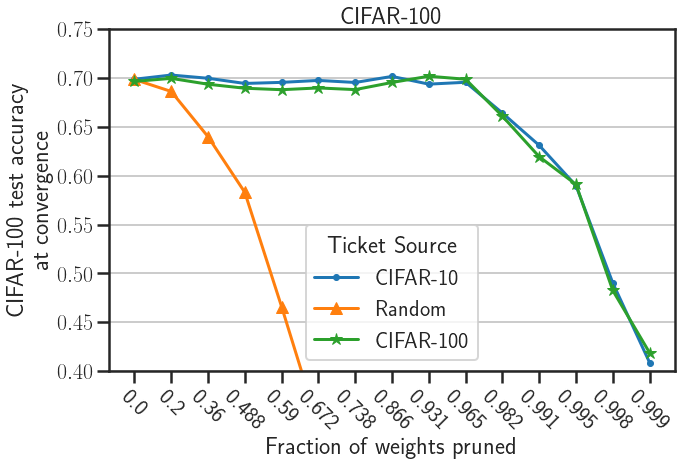

In [18]:
plt.figure(figsize=(10,7))
plt.plot([i for i in range(len(idx))], [cifar_10[i]/100 for i in idx], label='CIFAR-10', marker = '.')
plt.plot([i for i in range(len(idx))], [rd[i]/100 for i in idx], label="Random", marker='^')
plt.plot([i for i in range(len(idx))], [cifar_100[i]/100 for i in idx], label='CIFAR-100', marker='*')
plt.title("CIFAR-100")
plt.xlabel("Fraction of weights pruned")
plt.ylabel("CIFAR-100 test accuracy\n at convergence")
tick_lbls = [np.round(x[i]/100, 3) for i in idx]
plt.xticks(range(len(idx)), tick_lbls, rotation = -45)
plt.grid(axis='y')
plt.legend(loc="best",title="Ticket Source")
plt.ylim(0.4,0.75)
plt.tight_layout()
plt.savefig("finalplots/Exp2_VGG_CIFAR100_N1.pdf")

# SVHN

In [21]:
df3.head()

,Unnamed: 1,Accuracy on SVHN,Unnamed: 3,Unnamed: 4,Unnamed: 5
NaN,Percentage of Weights Prune,CIFAR10,CIFAR100,SVHN,Random
0.0,0,95.7014,95.7053,95.6131,94.937
1.0,20,95.7821,95.663,95.8013,95.6707
2.0,36,96.0664,95.736,95.9319,95.6093
3.0,48.8,96.0779,95.7053,95.9281,95.2021


In [22]:
df3 = df3.rename(columns = {"Unnamed: 1":"% Pruned", "Accuracy on SVHN":"CIFAR10", "Unnamed: 3":"CIFAR100", "Unnamed: 4":"SVHN","Unnamed: 5":"Random"})

In [23]:
df3.dropna(inplace = True)
df3 = df3.iloc[1:]

In [24]:
df3.head()

,% Pruned,CIFAR10,CIFAR100,SVHN,Random
0.0,0,95.7014,95.7053,95.6131,94.937
1.0,20,95.7821,95.663,95.8013,95.6707
2.0,36,96.0664,95.736,95.9319,95.6093
3.0,48.8,96.0779,95.7053,95.9281,95.2021
4.0,59.04,96.0741,95.7091,95.9012,93.896


In [25]:
x = np.float64(df3["% Pruned"].values)
cifar_10 = np.float64(df3["CIFAR10"].values)
cifar_100 = np.float64(df3["CIFAR100"].values)
svhn =  np.float64(df3["SVHN"].values)
rd = np.float64(df3["Random"].values)

In [26]:
idx_vals = [0,20,36,48.8,59.04,67.23,73.79,86.58,93.13,96.48,98.2,99.08,99.53,99.81,99.88]
idx = []
for i in range(len(x)):
    for j in range(len(idx_vals)):
        if x[i] == idx_vals[j]:
            idx.append(i)
idx.sort()

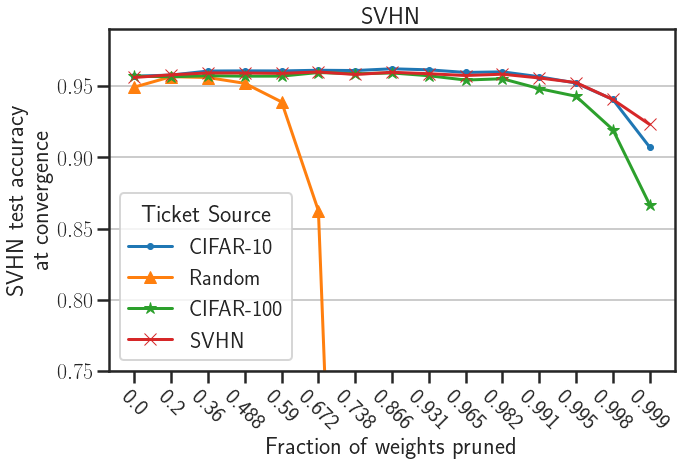

In [27]:
plt.figure(figsize=(10,7))
plt.plot([i for i in range(len(idx))], [cifar_10[i]/100 for i in idx], label='CIFAR-10', marker = '.')
plt.plot([i for i in range(len(idx))], [rd[i]/100 for i in idx], label="Random", marker='^')
plt.plot([i for i in range(len(idx))], [cifar_100[i]/100 for i in idx], label='CIFAR-100', marker='*')
plt.plot([i for i in range(len(idx))], [svhn[i]/100 for i in idx], label='SVHN', marker='x')

plt.title("SVHN")
plt.xlabel("Fraction of weights pruned")
plt.ylabel("SVHN test accuracy\n at convergence")
tick_lbls = [np.round(x[i]/100, 3) for i in idx]
plt.xticks(range(len(idx)), tick_lbls, rotation = -45)
plt.grid(axis='y')
plt.legend(loc="best",title="Ticket Source")
plt.ylim(0.75,0.99)
plt.tight_layout()
plt.savefig("finalplots/Exp2_VGG_SVHN_N.pdf")

In [28]:
df4.head()

,Unnamed: 1,Accuracy on FashionMNIST,Unnamed: 3,Unnamed: 4,Unnamed: 5
NaN,Percentage of Weights Prune,CIFAR10,CIFAR100,FashionMNINST,Random
0.0,0,NaN,NaN,NaN,NaN
1.0,20,NaN,NaN,NaN,NaN
2.0,36,NaN,NaN,NaN,NaN
3.0,48.8,NaN,NaN,NaN,NaN


In [29]:
df4 = df4.rename(columns = {"Unnamed: 1":"% Pruned", "Accuracy on FashionMNIST":"CIFAR10", "Unnamed: 3":"CIFAR100", "Unnamed: 4":"FashionMNIST","Unnamed: 5":"Random"})

In [30]:
df4.dropna(inplace = True)
df4 = df4.iloc[1:]

In [31]:
df4.head()

,% Pruned,CIFAR10,CIFAR100,FashionMNIST,Random


In [32]:
x = np.float64(df4["% Pruned"].values)
cifar_10 = np.float64(df4["CIFAR10"].values)
cifar_100 = np.float64(df4["CIFAR100"].values)
fmnist =  np.float64(df4["FashionMNIST"].values)
rd = np.float64(df4["Random"].values)

In [33]:
idx_vals = [0,20,36,48.8,59.04,67.23,73.79,86.58,93.13,96.48,98.2,99.08,99.53,99.81,99.88]
idx = []
for i in range(len(x)):
    for j in range(len(idx_vals)):
        if x[i] == idx_vals[j]:
            idx.append(i)
idx.sort()

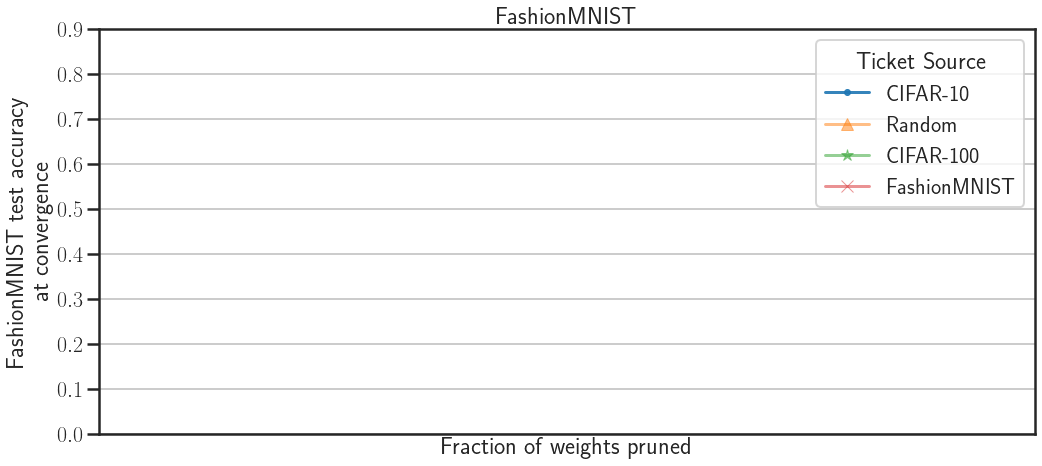

In [34]:
plt.figure(figsize=(15,7))
plt.plot([i for i in range(len(idx))], [cifar_10[i]/100 for i in idx], label='CIFAR-10', marker = '.', alpha=0.9)
plt.plot([i for i in range(len(idx))], [rd[i]/100 for i in idx], label="Random", marker='^', alpha=0.5)
plt.plot([i for i in range(len(idx))], [cifar_100[i]/100 for i in idx], label='CIFAR-100', marker='*', alpha=0.5)
plt.plot([i for i in range(len(idx))], [fmnist[i]/100 for i in idx], label='FashionMNIST', marker='x', alpha=0.5)

plt.title("FashionMNIST")
plt.xlabel("Fraction of weights pruned")
plt.ylabel("FashionMNIST test accuracy\n at convergence")
tick_lbls = [np.round(x[i]/100, 3) for i in idx]
plt.xticks(range(len(idx)), tick_lbls, rotation = -45)
plt.grid(axis='y')
plt.legend(loc="best",title="Ticket Source")
plt.ylim(0.0,0.9)
plt.tight_layout()
plt.savefig("finalplots/Exp2_VGG_FashionMNIST1.pdf")